1. IMPORTING LIBRARIES AND READING THE DATASET

In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, plot_confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report


In [132]:
data = pd.read_csv('cars_class.csv')

In [133]:
data.shape

(719, 20)

In [134]:
data.size

14380

In [135]:
data.head(5).style.background_gradient(cmap='YlOrRd')

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196,1
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196,2


In [136]:
data.describe().round(3).style.background_gradient()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,360.000000,93.435000,44.851000,81.723000,168.580000,61.847000,8.626000,168.138000,41.075000,20.531000,148.031000,188.168000,436.216000,174.726000,72.683000,6.344000,12.395000,188.798000,195.408000,1.470000
std,207.702000,8.111000,6.150000,15.528000,33.809000,8.259000,4.917000,32.938000,7.764000,2.561000,14.560000,31.235000,174.965000,32.150000,7.542000,4.856000,8.743000,6.049000,7.235000,1.126000
min,1.000000,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,0.000000
25%,180.500000,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,146.000000,33.000000,19.000000,137.000000,167.000000,317.000000,149.000000,68.000000,2.000000,5.500000,184.000000,190.000000,0.000000
50%,360.000000,93.000000,44.000000,79.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,362.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000,1.000000
75%,539.500000,99.000000,49.000000,96.000000,194.500000,65.000000,10.000000,197.500000,46.000000,23.000000,159.000000,216.000000,584.500000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000,2.000000
max,719.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,262.000000,135.000000,22.000000,41.000000,204.000000,211.000000,3.000000


In [137]:
data.info() # showing basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            719 non-null    int64
 1   Comp          719 non-null    int64
 2   Circ          719 non-null    int64
 3   D.Circ        719 non-null    int64
 4   Rad.Ra        719 non-null    int64
 5   Pr.Axis.Ra    719 non-null    int64
 6   Max.L.Ra      719 non-null    int64
 7   Scat.Ra       719 non-null    int64
 8   Elong         719 non-null    int64
 9   Pr.Axis.Rect  719 non-null    int64
 10  Max.L.Rect    719 non-null    int64
 11  Sc.Var.Maxis  719 non-null    int64
 12  Sc.Var.maxis  719 non-null    int64
 13  Ra.Gyr        719 non-null    int64
 14  Skew.Maxis    719 non-null    int64
 15  Skew.maxis    719 non-null    int64
 16  Kurt.maxis    719 non-null    int64
 17  Kurt.Maxis    719 non-null    int64
 18  Holl.Ra       719 non-null    int64
 19  Class         719 non-null   

In [138]:
data.dtypes

ID              int64
Comp            int64
Circ            int64
D.Circ          int64
Rad.Ra          int64
Pr.Axis.Ra      int64
Max.L.Ra        int64
Scat.Ra         int64
Elong           int64
Pr.Axis.Rect    int64
Max.L.Rect      int64
Sc.Var.Maxis    int64
Sc.Var.maxis    int64
Ra.Gyr          int64
Skew.Maxis      int64
Skew.maxis      int64
Kurt.maxis      int64
Kurt.Maxis      int64
Holl.Ra         int64
Class           int64
dtype: object

In [139]:
data.sample(n=5).T.round(3).style.background_gradient(cmap = 'coolwarm') # TAKING RANDOM SAMPLES IN THE GIVEN DATAFRAME

,127,534,380,197,98
ID,128,535,381,198,99
Comp,97,80,106,96,109
Circ,38,36,53,55,52
D.Circ,75,69,98,103,95
Rad.Ra,188,127,176,201,189
Pr.Axis.Ra,68,56,54,65,58
Max.L.Ra,6,7,10,9,4
Scat.Ra,171,128,216,204,227
Elong,37,53,31,32,29
Pr.Axis.Rect,20,18,24,23,25


**DATA PREPROCESSING AND VISULAIZATION**

In [140]:
data.isnull().sum() # for finding any null values occurences

ID              0
Comp            0
Circ            0
D.Circ          0
Rad.Ra          0
Pr.Axis.Ra      0
Max.L.Ra        0
Scat.Ra         0
Elong           0
Pr.Axis.Rect    0
Max.L.Rect      0
Sc.Var.Maxis    0
Sc.Var.maxis    0
Ra.Gyr          0
Skew.Maxis      0
Skew.maxis      0
Kurt.maxis      0
Kurt.Maxis      0
Holl.Ra         0
Class           0
dtype: int64

In [141]:
data.nunique() # TO FIND UNIQUE VALUES IN EACH FEATURE

ID              719
Comp             43
Circ             27
D.Circ           60
Rad.Ra          132
Pr.Axis.Ra       37
Max.L.Ra         21
Scat.Ra         125
Elong            35
Pr.Axis.Rect     13
Max.L.Rect       66
Sc.Var.Maxis    124
Sc.Var.maxis    380
Ra.Gyr          138
Skew.Maxis       39
Skew.maxis       23
Kurt.maxis       38
Kurt.Maxis       29
Holl.Ra          31
Class             4
dtype: int64

In [142]:
data.duplicated().sum()

0

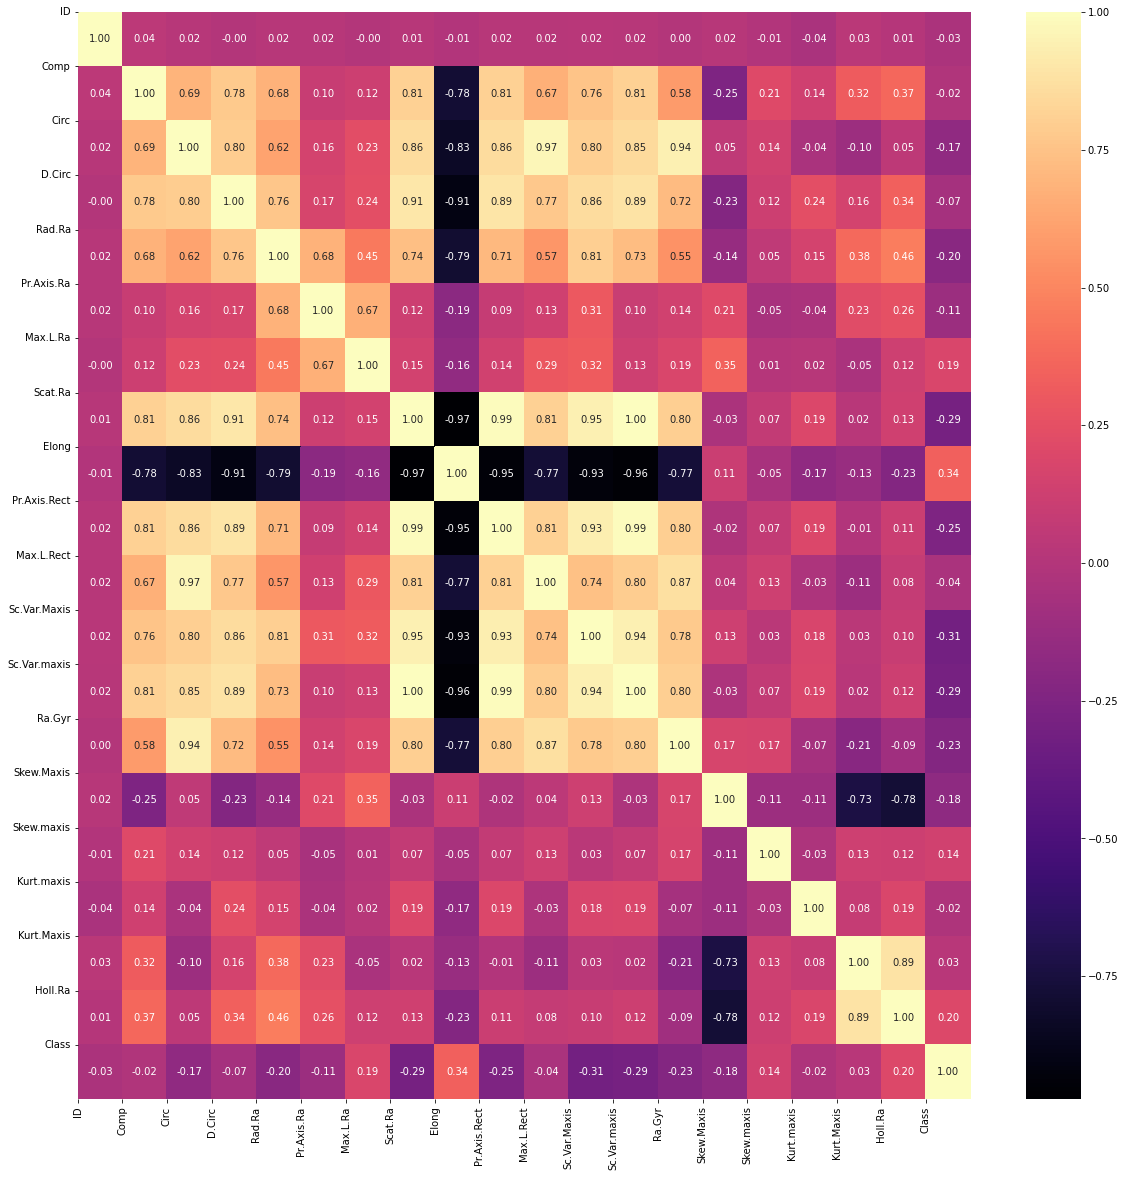

In [143]:
corr = data.corr() 
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [144]:
drop_cols = ['ID', 'Comp',  'Pr.Axis.Ra', 'Max.L.Ra', 'Elong', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis', 'Kurt.Maxis', 'Holl.Ra']     # THESE FEATURES MAY HAD AS MANY UNIQUE DATA POINTS SO ITS BETTER TO DROP THOSE FEATURES
df = data.drop(drop_cols, axis = 1)

In [145]:
df

,Circ,D.Circ,Rad.Ra,Scat.Ra,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Class
0,39,70,166,148,19,134,167,332,143,0
1,35,64,129,116,17,125,138,200,123,3
2,41,84,141,149,19,143,170,330,158,3
3,54,98,177,219,25,171,219,706,223,1
4,39,74,152,151,19,136,174,337,140,2
...,...,...,...,...,...,...,...,...,...,...
714,58,105,183,265,29,174,285,1018,255,0
715,43,76,149,149,19,143,172,335,176,2
716,42,63,144,131,18,142,154,259,162,3
717,56,101,231,217,24,171,232,698,216,2


In [146]:
df.shape

(719, 10)

In [147]:
print(df['Circ'].unique())
print(df['D.Circ'].unique())
print(df['Rad.Ra'].unique())
print(df['Scat.Ra'].unique())
print(df['Pr.Axis.Rect'].unique())
print(df['Max.L.Rect'].unique())
print(df['Sc.Var.Maxis'].unique())
print(df['Sc.Var.maxis'].unique())
print(df['Ra.Gyr'].unique())
print(df['Class'].unique())

[39 35 41 54 46 37 55 38 40 45 36 34 52 51 47 44 53 43 57 50 42 59 48 56
 33 58 49]
[ 70  64  84  98  74  76  66  89  58  83  78 109  71  53  82 103  59  68
 100 101 104  63  69  77  96  92  81 105  73  88  80 107  72 106  85  65
  79  75 108  87  86  54 110  47  90  40  95  60  61  93  94 102  62  91
  52  44  57  55  51  49]
[166 129 141 177 152 162 151 199 176 137 154 186 175 149 230 117 213 145
 171 163 134 169 224 219 208 115 127 142 153 188 194 143 183 164 225 180
 140 207 133 209 147 210 113 150 206 187 139 123 132 227 306 228 110 159
 170 201 202 182 189 195 128 131 155 116 181 172 197 119 173 121 231 135
 220 204 130 126 111 203 161 165 191 185 179 212 223 222 125 192 160 218
 148 136 211 124 178 198 193 174 144 167 122 157 138 158 146 196 168 322
 156 221 190 120 205 184 214 215 252 114 235 109 234 246 250 216 200 118
 238 105 217 112 333 226]
[148 116 149 219 151 162 128 165 240 169 122 160 158 157 147 218 153 118
 186 159 221 135 216 215 224 191 142 138 146 139 188 220 133 

DECLARING TARGET AND FEATURE COLUMN

In [148]:
y = df['Class']
X= df.drop('Class', axis = 1)

In [149]:
X.head(2).style.background_gradient(cmap = 'binary',low = 0.4, high = 0.5)

,Circ,D.Circ,Rad.Ra,Scat.Ra,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr
0,39,70,166,148,19,134,167,332,143
1,35,64,129,116,17,125,138,200,123


In [150]:
y.value_counts()

0    189
1    180
3    177
2    173
Name: Class, dtype: int64

In [151]:
y.unique()

array([0, 3, 1, 2])

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [153]:
print("shape of X_train :", X_train.shape)
print("shape of X_test :", X_test.shape)
print("shape of y_train :", y_train.shape)
print("shape of y_test :", y_test.shape)

shape of X_train : (575, 9)
shape of X_test : (144, 9)
shape of y_train : (575,)
shape of y_test : (144,)


In [154]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 475 to 684
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Circ          575 non-null    int64
 1   D.Circ        575 non-null    int64
 2   Rad.Ra        575 non-null    int64
 3   Scat.Ra       575 non-null    int64
 4   Pr.Axis.Rect  575 non-null    int64
 5   Max.L.Rect    575 non-null    int64
 6   Sc.Var.Maxis  575 non-null    int64
 7   Sc.Var.maxis  575 non-null    int64
 8   Ra.Gyr        575 non-null    int64
dtypes: int64(9)
memory usage: 44.9 KB


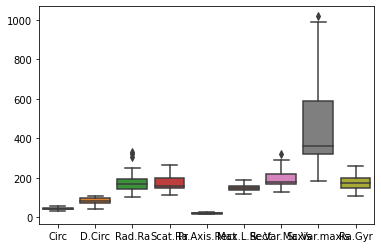

In [155]:
sns.boxplot(data = X_train)


In [156]:
ss = StandardScaler()

In [157]:
X_train = ss.fit_transform(X_train)

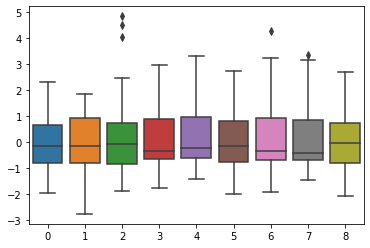

In [158]:
sns.boxplot(data = X_train)

In [159]:
X_test = ss.transform(X_test)

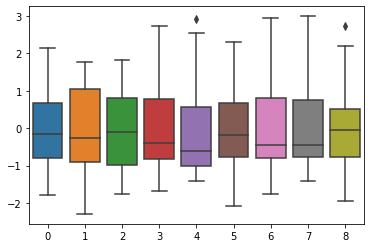

In [160]:
sns.boxplot(data = X_test)

# *BUILDING CLASSIFICATION MODELS*

**1. LOGISTIC REGRESSION** 

In [161]:
lr = LogisticRegression()

import time
start = time.time()
lr.fit(X_train, y_train)
end = time.time()
print(end-start)

0.053037166595458984


In [162]:
str1 = lr.score(X_train, y_train)
stst1 = lr.score(X_test, y_test)
print(str1)
print(stst1)

0.6660869565217391
0.6319444444444444


**2. SUPPORT VECTOR CLASSIFIER**

In [163]:
svc = SVC()

import time
start = time.time()
svc.fit(X_train, y_train)
end = time.time()
print(end-start)

0.02250981330871582


In [164]:
str2 = svc.score(X_train, y_train)
stst2 = svc.score(X_test, y_test)
print(str2)
print(stst2)

0.7286956521739131
0.6875


**3. KNeighborsClassifier**

In [165]:
knn = KNeighborsClassifier()

import time
start = time.time()
knn.fit(X_train, y_train)
end = time.time()
print(end-start)

0.003268718719482422


In [166]:
str3 = knn.score(X_train, y_train)
stst3 = knn.score(X_test, y_test)
print(str3)
print(stst3)

0.8243478260869566
0.6875


**4. DECISION TREE CALSSIFIER**

In [167]:
dtc  = DecisionTreeClassifier()

import time
start = time.time()
dtc.fit(X_train, y_train)
end = time.time()
print(end-start)

0.006941318511962891


In [168]:
str4 = dtc.score(X_train, y_train)
stst4 = dtc.score(X_test, y_test)
print(str4)
print(stst4)

1.0
0.7013888888888888


**5.GRADIENT BOOSTING  CLASSIFIER**

In [169]:
gbc  = GradientBoostingClassifier()

import time
start = time.time()
gbc.fit(X_train, y_train)
end = time.time()
print(end-start)

0.7365841865539551


In [170]:
str5 = gbc.score(X_train, y_train)
stst5 = gbc.score(X_test, y_test)
print(str5)
print(stst5)

0.9843478260869565
0.7083333333333334


 **6. RANDOM FOREST CLASSIFIER**

In [171]:
rfc  = RandomForestClassifier()

import time
start = time.time()
rfc.fit(X_train, y_train)
end = time.time()
print(end-start)

0.23466277122497559


In [172]:
str6 = rfc.score(X_train, y_train)
stst6 = rfc.score(X_test, y_test)
print(str6)
print(stst6)

1.0
0.7361111111111112


**7. GAUSSIAN NAIVE BAYES**

In [173]:
gnb  = GaussianNB()

import time
start = time.time()
gnb.fit(X_train, y_train)
end = time.time()
print(end-start)

0.0026068687438964844


In [174]:
str7 = gnb.score(X_train, y_train)
stst7 = gnb.score(X_test, y_test)
print(str7)
print(stst7)

0.4191304347826087
0.4375


In [175]:
TRAIN_SCORE= [str1, str2, str3, str4, str5, str6, str7]
TRAIN_SCORE


[0.6660869565217391,
 0.7286956521739131,
 0.8243478260869566,
 1.0,
 0.9843478260869565,
 1.0,
 0.4191304347826087]

In [176]:
TEST_SCORE = [stst1, stst2, stst3, stst4, stst5, stst6, stst7]
TEST_SCORE

[0.6319444444444444,
 0.6875,
 0.6875,
 0.7013888888888888,
 0.7083333333333334,
 0.7361111111111112,
 0.4375]

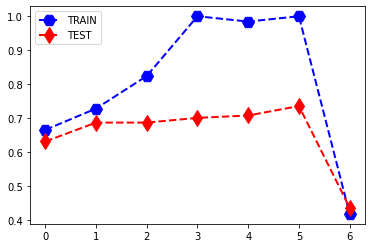

In [177]:
plt.plot(TRAIN_SCORE, color='b', marker='H', linestyle='dashed', linewidth=2, markersize=12, label = 'TRAIN')
plt.plot(TEST_SCORE, color='r', marker='d', linestyle='dashed', linewidth=2, markersize=12, label = 'TEST')
plt.legend()

## **FINAL MODEL IS RANDOM FOREST CLASSIFIER**

In [178]:
rfc  = RandomForestClassifier()

import time
start = time.time()
rfc.fit(X_train, y_train)
end = time.time()
print(end-start)

0.2224287986755371


In [179]:
ts = rfc.score(X_train, y_train)
tt = rfc.score(X_test, y_test)
print(ts)
print(tt)

1.0
0.7430555555555556


***finding accuracy_score for RFC***

In [196]:
y_pred = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7569444444444444


***FINDING F1_SCORE FOR RFC***

In [181]:
y_pred = rfc.predict(X_test)
print(f1_score(y_test, y_pred, average = 'micro'))

0.7430555555555556


***DISPLAYING THE CONFUSION MATRIX FOR RFC ON TEST DATA***

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


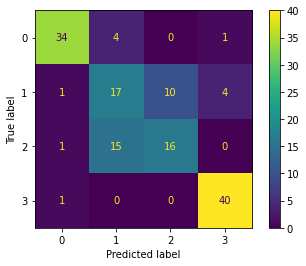

In [182]:
plot_confusion_matrix(rfc, X_test, y_test)

HYPER PARAMETER TUNING WITH GRIDSEARCH CV AND RANDOMIZED SEARCH CV ON RANDOM FOREST CLASSIFIER 

In [183]:
param_grid = {'n_estimators': [100, 200, 300], 'criterion' : ['gini', 'entropy', 'log_loss'], 
              'max_depth':[50, 100, 150], 'max_features' : ['sqrt', 'log2', 'None'], 
              'min_weight_fraction_leaf': [0, 0.6]}

In [184]:
GSCV = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv=3)

In [185]:
GSCV.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
378 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/p

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [50, 100, 150],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'min_weight_fraction_leaf': [0, 0.6],
                         'n_estimators': [100, 200, 300]})

In [186]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 150,
 'max_features': 'sqrt',
 'min_weight_fraction_leaf': 0,
 'n_estimators': 200}

In [187]:
GSCV.best_score_

0.7025978039557882

In [188]:
param_estimator = {'max_depth' : [3, 6, 9], 'min_samples_leaf' : [3, 5, 7], 'criterion' : ['gini', 'entropy']}

In [189]:
rscv = RandomizedSearchCV(RandomForestClassifier(), param_estimator, n_iter = 5, cv = 5) 

In [190]:
rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 6, 9],
                                        'min_samples_leaf': [3, 5, 7]})

In [191]:
rscv.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=3)

In [192]:
rscv.best_score_

0.6869565217391305

In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        39
           1       0.47      0.53      0.50        32
           2       0.62      0.50      0.55        32
           3       0.89      0.98      0.93        41

    accuracy                           0.74       144
   macro avg       0.72      0.72      0.72       144
weighted avg       0.74      0.74      0.74       144



**REPORT FOR THE DIFFERENT FEATURE IMPORTANCE**

In [194]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)
X_train = pd.DataFrame(X_train, columns = X.columns)
feature_scores = pd.Series(rfc.feature_importances_, index = X_train.columns).sort_values(ascending=False)
feature_scores

D.Circ          0.173334
Max.L.Rect      0.145794
Sc.Var.maxis    0.144518
Sc.Var.Maxis    0.120363
Scat.Ra         0.113484
Rad.Ra          0.093090
Ra.Gyr          0.088793
Circ            0.072883
Pr.Axis.Rect    0.047740
dtype: float64

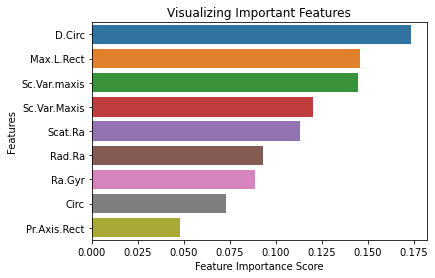

In [195]:
sns.barplot(x=feature_scores, y=feature_scores.index)
importance = rfc.feature_importances_
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()